In [1]:
import numpy as np
import matplotlib.pyplot as plt

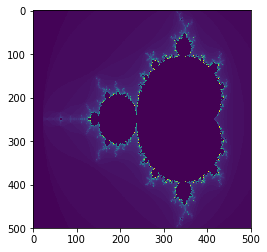

In [16]:
@np.vectorize
def mandel(c):
    z = 0
    for i in range(100):
        if abs(z)>2:
            return i
        z = z**2 + c
    return 0

N, M = 500, 500

x = np.linspace(-2.13, 0.77, N)
y = np.linspace(-1.13, 1.13, N)
X, Y = np.meshgrid(x, y)
Z = X + 1J*Y

image = mandel(Z)

#plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.imsave("mandel.png", image)

In [17]:
%timeit mandel(Z)

1.6 s ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


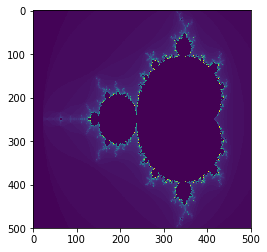

In [29]:
def mandel_numpy(c):
    z = 0
    image = np.zeros(c.shape, dtype=int)
    for i in range(100):
#        if abs(z)>2:
#            return i
        mask1 = (abs(z)>2) & (image==0)
        image[mask1] = i
        z = z**2 + c
    return image


def mandel_numpy(c):
    z = np.zeros(c.shape, dtype="complex128")
    image = np.zeros(c.shape, dtype=int)
    for i in range(100):
#        if abs(z)>2:
#            return i
        mask1 = (abs(z)>2) & (image==0)
        image[mask1] = i
        mask2 = abs(z)<2
        z[mask2] = z[mask2]**2 + c[mask2]
    return image

image = mandel_numpy(Z)

#plt.figure(figsize=(12, 12))
plt.imshow(image)


In [30]:
%timeit mandel_numpy(Z)

727 ms ± 9.72 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


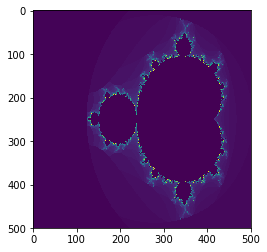

In [39]:
import numba

    
@numba.vectorize(['int64(complex128)'])
def mandel_numba(c):
    z = 0
    for i in range(100):
        if z.imag**2 + z.real**2>2:
            return i
        z = z**2 + c
    return 0

image = mandel_numba(Z)

#plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.imsave("mandel.png", image)

In [40]:
%timeit mandel_numba(Z)

28.4 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


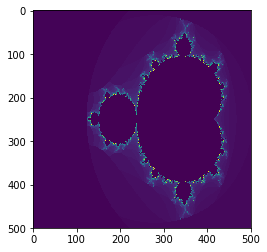

In [41]:
# Il ne faut pas utiliser d'objet avec numba

import numba

class Test():
    def machin(self):
        return 0

t = Test()

    
@numba.vectorize(['int64(complex128)'])
def mandel_numba(c):
    z = 0
    for i in range(100):
        if z.imag**2 + z.real**2>2:
            return i
        z = z**2 + c + t.machin()
    return 0

image = mandel_numba(Z)

#plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.imsave("mandel.png", image)

In [4]:
x = [1, 2, 3]
y = [25, 26, 27]

X, Y = np.meshgrid(x, y)
print(X)
print(Y)
print(X + 1J*Y)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[25 25 25]
 [26 26 26]
 [27 27 27]]
[[1.+25.j 2.+25.j 3.+25.j]
 [1.+26.j 2.+26.j 3.+26.j]
 [1.+27.j 2.+27.j 3.+27.j]]
